In [80]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


##Load IRIS datasets

In [27]:
iris = load_iris()
X = iris.data
y = iris.target

num_classes = len(np.unique(y))
theta = np.zeros((num_classes, X.shape[1]))


In [28]:
X, y = shuffle(X, y, random_state=42)

## Linear Classification


In [31]:
iris
iris_d=pd.Series(iris)
iris_df=pd.DataFrame(iris_d.data,columns=iris.feature_names)
iris_df["target"]=pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
iris_df.shape

(150, 5)

In [11]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<Axes: >

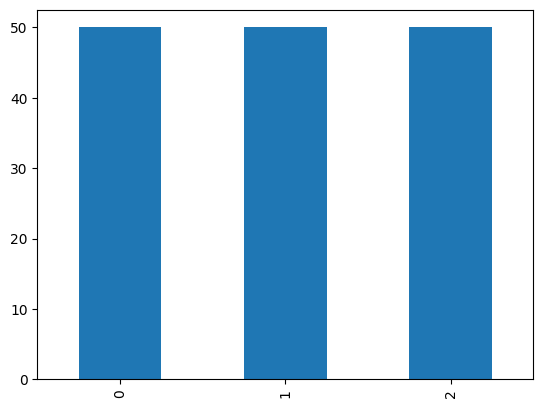

In [13]:
iris_df['target'].value_counts().plot(kind='bar')

In [14]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [15]:
iris_df.duplicated().sum()

1

In [16]:
#iris_df.drop_duplicates(inplace=True)
iris_df.duplicated().sum()


1

### Make Z for all feature


In [33]:
z=iris_df.copy(deep=True)

In [34]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y   # w=(Z^T * Z)^-1 * Z^T * b

In [52]:
len(z)

150

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

###training


In [72]:
for class_label in range(num_classes):
    y_one_vs_all = np.where(y_train == class_label, 1, 0)
    theta[class_label] = normal_equation(X_train, y_one_vs_all)

### prediction

In [76]:
predictions = X_test @ theta.T
len(predictions)

30

In [79]:
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted Labels:", predicted_labels)
print("True Labels:     ", y_test)

Predicted Labels: [2 1 1 0 2 0 1 1 0 0 1 0 2 1 2 0 2 1 1 0 0 2 1 0 1 1 0 2 1 0]
True Labels:      [2 1 1 0 2 0 1 1 0 0 1 0 1 1 2 0 2 1 1 0 0 2 2 0 2 1 0 2 1 0]


In [81]:

accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9
